In [2]:
##########################################
## II. Analytics ########
########################################


# import libraries and table from preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# import database
df = pd.read_pickle ("df_clean.pkl")


In [3]:

# import color mapping
from ColorMapping import color_mapping

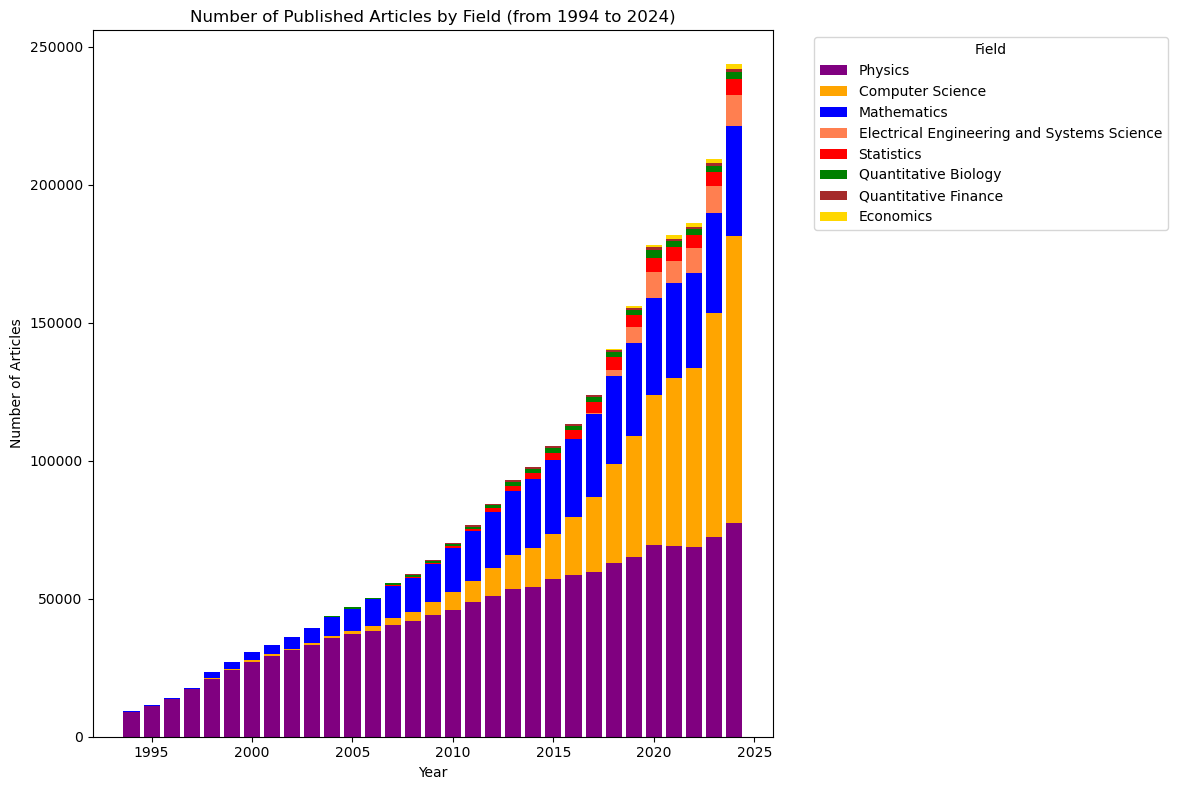

In [3]:
# 1. Group by year and field to count the number of publications
grouped = df.groupby(["year", "field"]).size().reset_index(name="count")

# 2. Pivot so that each row is a year and each column a field; fill missing with 0
pivot_data = grouped.pivot(index="year", columns="field", values="count").fillna(0)

# 3. Filter out years before 1994 and exclude 2025
pivot_data = pivot_data.loc[(pivot_data.index >= 1994) & (pivot_data.index < 2025)]

# 4. Sort fields by total frequency
field_totals = pivot_data.sum()
sorted_fields = field_totals.sort_values(ascending=False).index

# 5. Plot a stacked bar chart using the sorted fields
plt.figure(figsize=(12, 8))

# Initialize the bottom for stacking as an array of zeros with length equal to the number of years.
bottom = np.zeros(len(pivot_data.index))

# For each field (in order of frequency), plot the absolute values stacked on top of each other.
for field in sorted_fields:
    plt.bar(
        pivot_data.index,
        pivot_data[field],
        bottom=bottom,
        color=color_mapping.get(field, "lightgray"),  # default to lightgray if not found
        label=field
    )
    # Update the bottom for the next field
    bottom += pivot_data[field].values

plt.title("Number of Published Articles by Field (from 1994 to 2024)")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Total publications in 2024: 243681


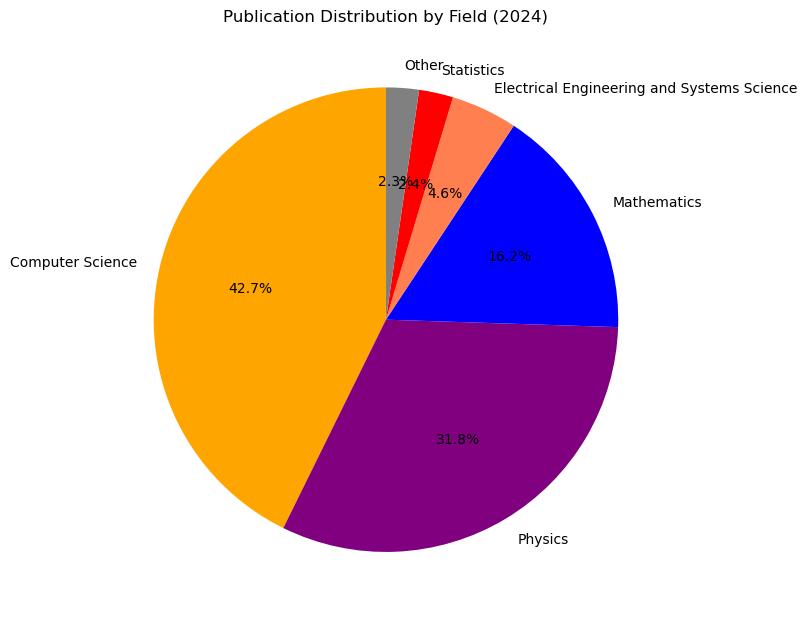

In [4]:
### Create Pie Chart for 2024 publications by field

# Filter the DataFrame for 2024
df_2024 = df[df['year'] == 2024]

# Count the number of publications per field
counts = df_2024['field'].value_counts()

# Print the total number of publications for 2024
print(f"Total publications in 2024: {len(df_2024)}")

# Calculate total counts and percentages
total = counts.sum()
perc = counts / total

# Set the threshold (1.5% in decimal form)
threshold = 0.015

# Split counts: main counts and those below threshold
main_counts = counts[perc >= threshold].copy()
others_count = counts[perc < threshold].sum()

# If there are any fields below the threshold, group them as "Other"
if others_count > 0:
    main_counts["Other"] = others_count

# Create a list of colors for the pie chart based on our mapping
colors = [color_mapping.get(field, "lightgray") for field in main_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
main_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Publication Distribution by Field (2024)')
plt.ylabel('')  # Hide the default y-label
plt.tight_layout()
plt.show()





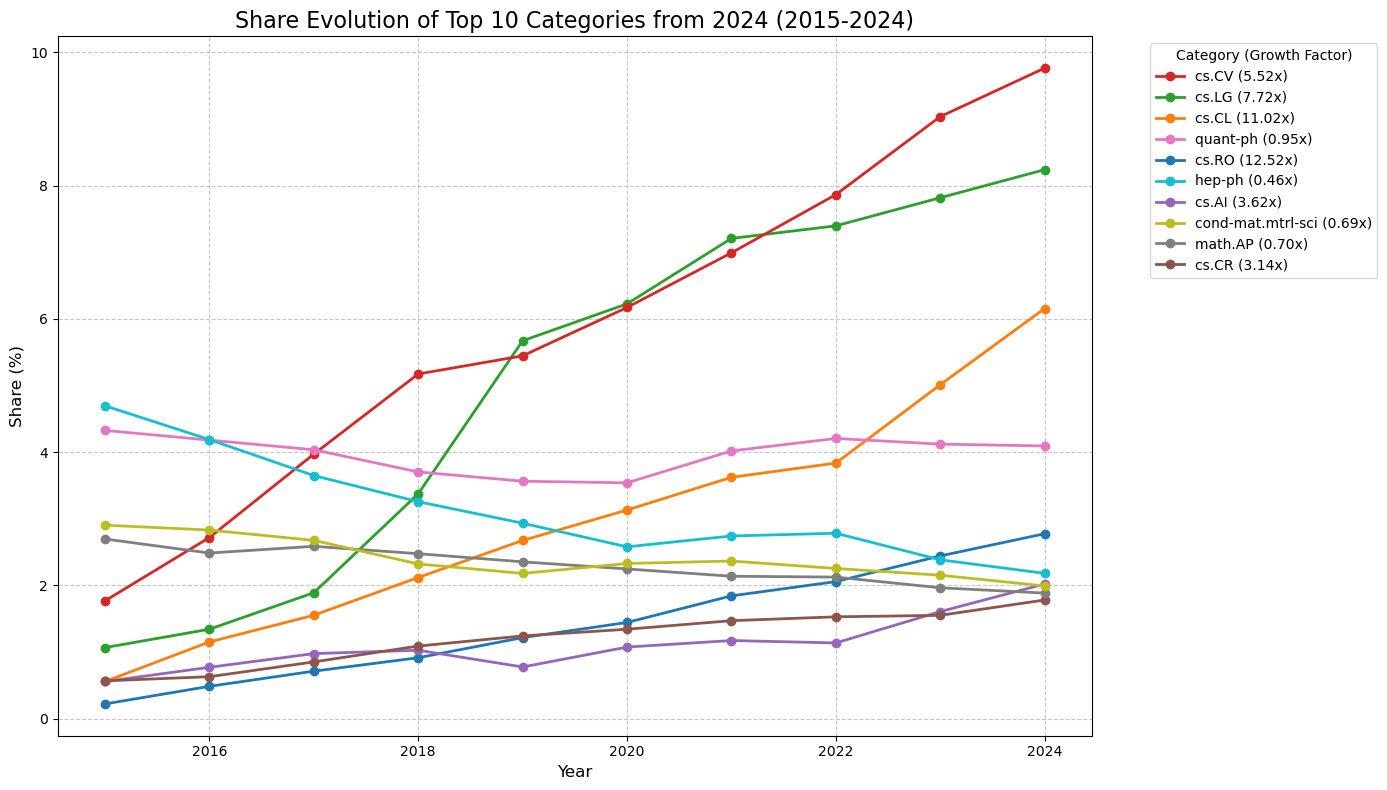

In [25]:
###################### 
## Top 10 Categories of 2024 in the course of time (last decade)

# Find the top 10 categories from 2024
df_2024 = df[df['year'] == 2024]
top_categories_2024 = df_2024['primary_category'].value_counts().nlargest(10).index

# Get data for the last decade (2015-2024)
last_decade = df[(df['year'] >= 2015) & (df['year'] <= 2024)]

# Group by year and category, then calculate counts
grouped = last_decade.groupby(['year', 'primary_category']).size().reset_index(name='count')

# Filter only for the top 10 categories from 2024
filtered = grouped[grouped['primary_category'].isin(top_categories_2024)]

# Calculate the total publications per year
year_totals = grouped.groupby('year')['count'].sum().reset_index()
year_totals.columns = ['year', 'total']

# Calculate percentage share
merged = pd.merge(filtered, year_totals, on='year')
merged['share'] = (merged['count'] / merged['total']) * 100

# Pivot for plotting
pivot_data = merged.pivot(index='year', columns='primary_category', values='share')

# Calculate growth factor (2024 share / 2015 share)
growth = pivot_data.iloc[-1] / pivot_data.iloc[0]
sorted_categories = growth.sort_values(ascending=False).index

# Create the plot
plt.figure(figsize=(14, 8))
for category in sorted_categories:
    plt.plot(pivot_data.index, pivot_data[category], marker='o', linewidth=2, 
             label=f"{category} ({growth[category]:.2f}x)")

plt.title('Share Evolution of Top 10 Categories from 2024 (2015-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Share (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Sort legend by frequency in 2024
handles, labels = plt.gca().get_legend_handles_labels()

# Extract categories from labels and create (handle, label, category) tuples
items = [(h, l, l.split(' ')[0]) for h, l in zip(handles, labels)]

# Sort by category frequency in 2024
items.sort(key=lambda x: pivot_data.iloc[-1].get(x[2], 0), reverse=True)

# Extract sorted handles and labels
sorted_handles, sorted_labels, _ = zip(*items)

plt.legend(sorted_handles, sorted_labels, title='Category (Growth Factor)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

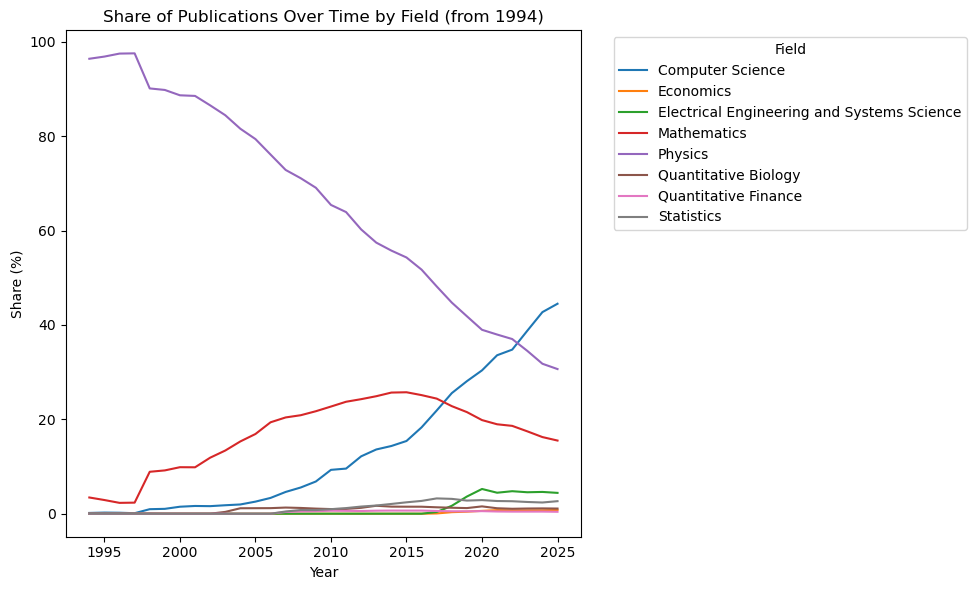

In [ ]:
#### Create Chart of shares over time
############## Attempt: Being left out in analysis


'''
# 1. Group by year and field to count the number of publications
grouped = df.groupby(["year", "field"]).size().reset_index(name="count")

# 2. Pivot so that each row is a year, each column is a field, and the cell value is the count
pivot_data = grouped.pivot(index="year", columns="field", values="count").fillna(0)

# 3. Filter out years before 1994
pivot_data = pivot_data.loc[pivot_data.index >= 1994]

# 4. Calculate the total publications per year, then compute the percentage share per field
year_totals = pivot_data.sum(axis=1)
shares = pivot_data.div(year_totals, axis=0) * 100  # convert to percentages

# 5. Plot the share of each field over time, removing data points (no marker)
plt.figure(figsize=(10, 6))

for column in shares.columns:
    plt.plot(shares.index, shares[column], label=column)  # no marker parameter

plt.title("Share of Publications Over Time by Field (from 1994)")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##############################
### Shares of Publications ober Time by Field is not really represantative for research activity in respective year
### THerefore Decision: Not be used 
'''

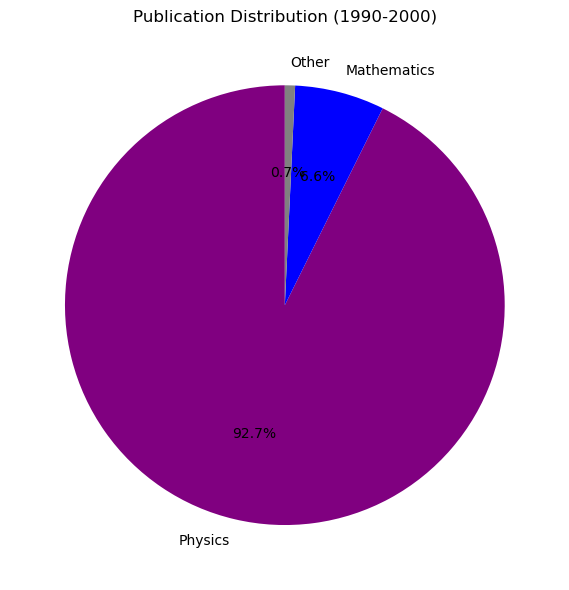

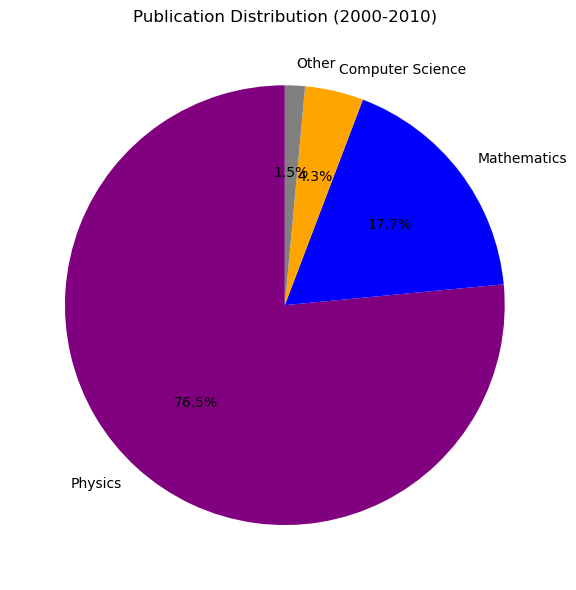

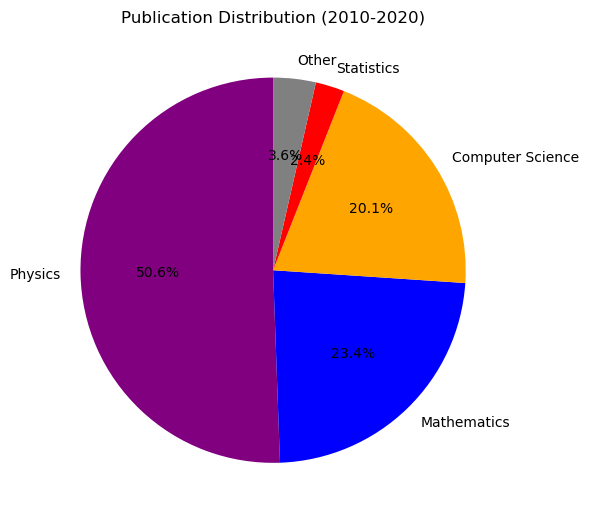

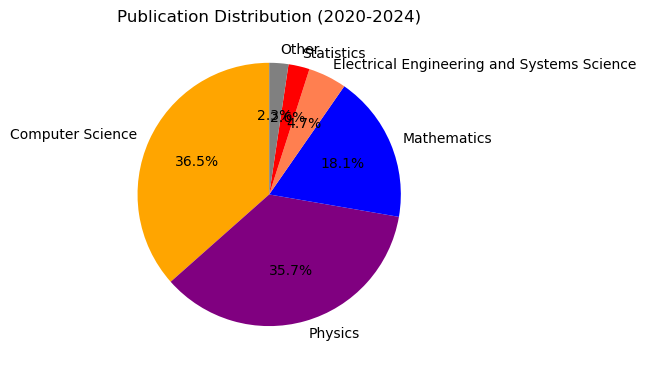

In [ ]:
### 1. Create Pie Chart from binned year ranges
############## Attempt: Being left out in analysis

'''
# Define year ranges (inclusive).
year_ranges = [
    (1990, 2000),
    (2000, 2010),
    (2010, 2020),
    (2020, 2024)
]

# Loop through each year range to create a pie chart.
for start, end in year_ranges:
    # Filter the DataFrame for the given year range.
    df_subset = df[df['year'].between(start, end)]
    
    # Count the number of publications per field.
    counts = df_subset['field'].value_counts()
    
    # Calculate total counts and percentages.
    total = counts.sum()
    perc = counts / total
    
    # Set the threshold (1.5% in decimal form).
    threshold = 0.015
    
    # Split counts: main counts and those below threshold.
    main_counts = counts[perc >= threshold].copy()
    others_count = counts[perc < threshold].sum()
    
    # If there are any fields below the threshold, group them as "Other".
    if others_count > 0:
        main_counts["Other"] = others_count

    # Create a list of colors for the pie chart based on our mapping.
    # If a field is missing from the mapping, it will default to a fallback color.
    colors = [color_mapping.get(field, "lightgray") for field in main_counts.index]
    
    # Plot the pie chart.
    plt.figure(figsize=(6, 6))
    main_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Publication Distribution ({start}-{end})')
    plt.ylabel('')  # Hide the default y-label
    plt.tight_layout()
    plt.show()
'''